# Information about data variables
### 1. Age: age of the patient [years]
### 3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
### 4. RestingBP: resting blood pressure [mm Hg]
### 5. Cholesterol: serum cholesterol [mm/dl]
### 6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
### 7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
### 8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
### 9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
### 10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
### 11.ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
### 12. HeartDisease: output class [1: heart disease, 0: Normal]

In [90]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
538,54,M,ASY,130,202,1,Normal,112,Y,2.0,Flat,1
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
792,46,M,NAP,150,231,0,Normal,147,N,3.6,Flat,1
830,41,F,ATA,130,204,0,LVH,172,N,1.4,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis:

C:\Users\ankit\AppData\Local\Temp\ipykernel_21940\273965398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age,bins=50)


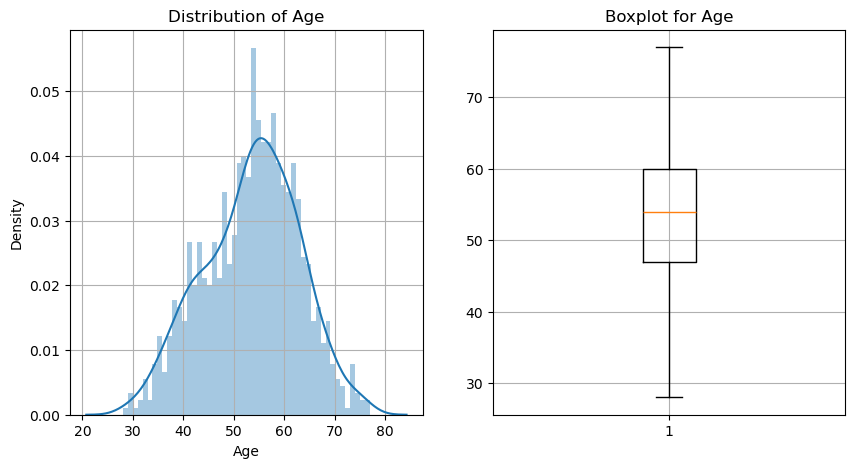

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df.Age,bins=50)
plt.title("Distribution of Age")
plt.grid()

plt.subplot(1,2,2)
plt.boxplot(df.Age)
plt.title("Boxplot for Age")
plt.grid()
plt.show()

## Result: Most of the age group lies in range 50-60

In [9]:
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

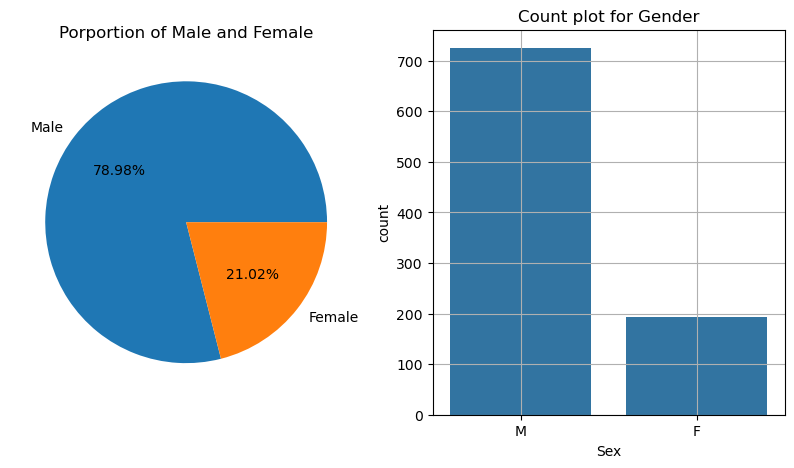

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.Sex.value_counts(),labels=['Male',"Female"],autopct='%1.2f%%')
plt.title("Porportion of Male and Female")

plt.subplot(1,2,2)
sns.barplot(df.Sex.value_counts())
plt.title("Count plot for Gender")
plt.grid()
plt.show()

## Result: About 80% of the patients are male and rest are female

In [12]:
chest_VC = df.	ChestPainType.value_counts()

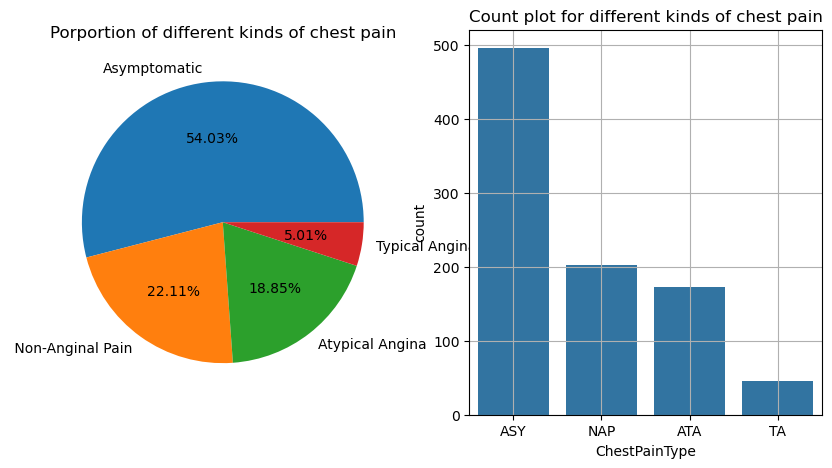

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.ChestPainType.value_counts(),labels=["Asymptomatic"," Non-Anginal Pain","Atypical Angina","Typical Angina"],autopct='%1.2f%%')
plt.title("Porportion of different kinds of chest pain")

plt.subplot(1,2,2)
sns.barplot(df.ChestPainType.value_counts())
plt.title('Count plot for different kinds of chest pain')
plt.grid()
plt.show()


## Result:
### 1. 54% of patients has Asymptomatic.
### 2. 22% of patients has  Non-Anginal.
### 3. 19% of patients has  Atypical Angina.
### 4. 5% of patients has Typical Angina.

C:\Users\ankit\AppData\Local\Temp\ipykernel_21940\1486679930.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.RestingBP,bins=15)


Text(0.5, 1.0, 'Box plot for Resting Blood pressure(mm. hg)')

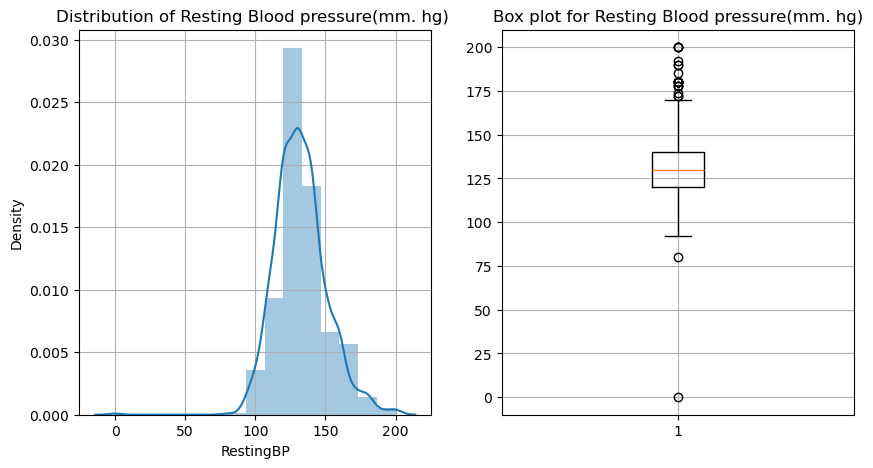

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df.RestingBP,bins=15)
plt.title('Distribution of Resting Blood pressure(mm. hg) ')
plt.grid()

plt.subplot(1,2,2)
plt.boxplot(df.RestingBP)
plt.grid()
plt.title('Box plot for Resting Blood pressure(mm. hg)')

## Result: Most of the patients blood pressure are in range 120-150mm. hg

C:\Users\ankit\AppData\Local\Temp\ipykernel_21940\1224429269.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Cholesterol,bins=15)


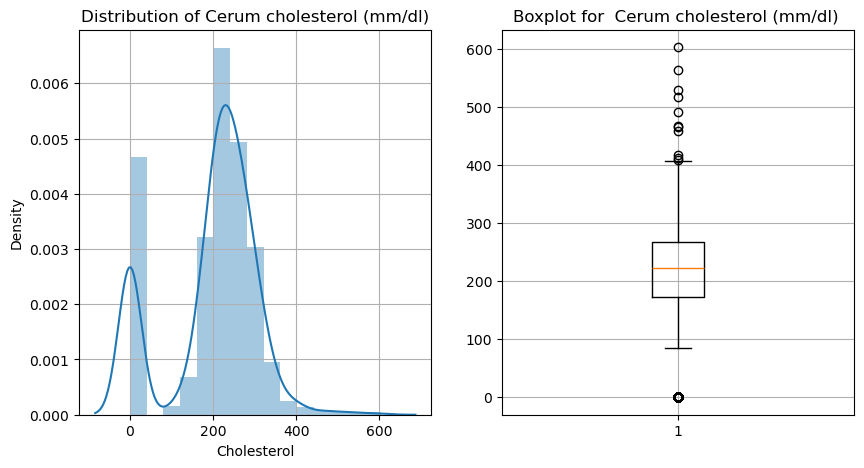

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df.Cholesterol,bins=15)
plt.grid()
plt.title('Distribution of Cerum cholesterol (mm/dl)')

plt.subplot(1,2,2)
plt.boxplot(df.Cholesterol)
plt.title("Boxplot for  Cerum cholesterol (mm/dl) ")
plt.grid()

## Result: Most of the patients Cholesterol are in range 170-350mm/dl

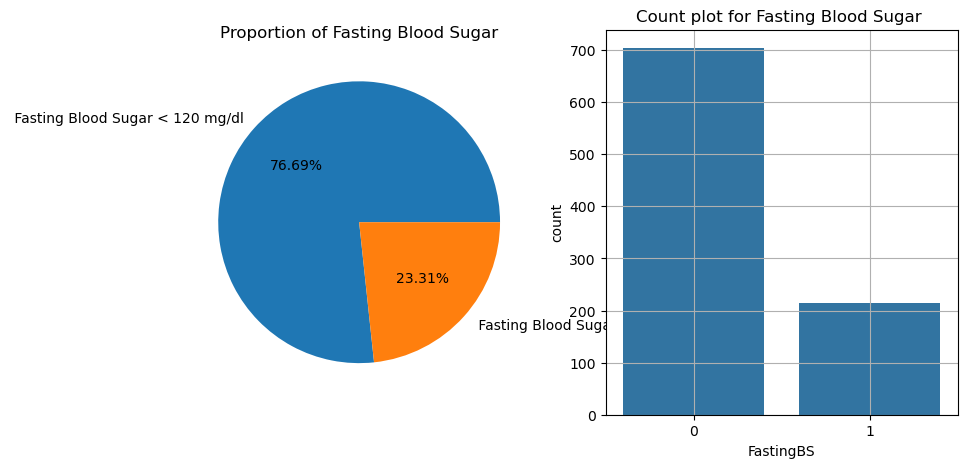

In [109]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.FastingBS.value_counts(),labels=[' Fasting Blood Sugar < 120 mg/dl', ' Fasting Blood Sugar > 120 mg/dl'],autopct='%1.2f%%')
plt.title("Proportion of Fasting Blood Sugar")

plt.subplot(1,2,2)
sns.barplot(df.FastingBS.value_counts())
plt.title("Count plot for Fasting Blood Sugar ")
plt.grid()

plt.show()

## Result : About 77% of the paitent's Blood sugar are below 120 mg/dl

In [18]:
df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

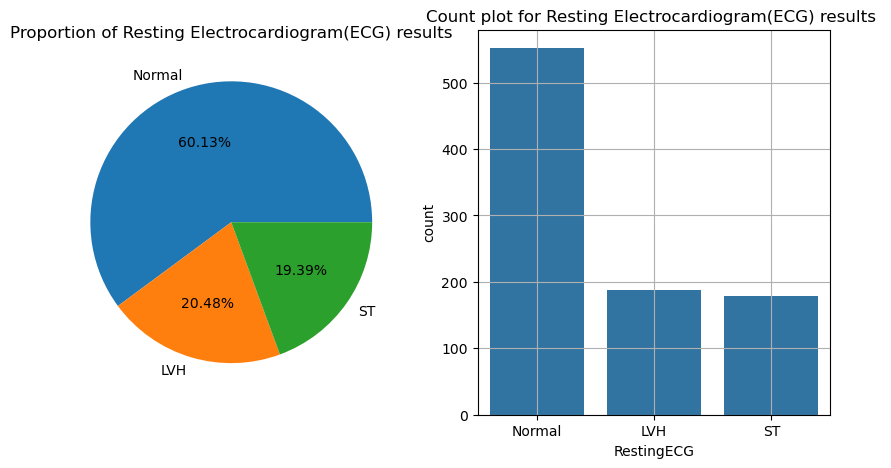

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.RestingECG.value_counts(),labels=["Normal",'LVH','ST'],autopct='%1.2f%%')
plt.title('Proportion of Resting Electrocardiogram(ECG) results')

plt.subplot(1,2,2)
sns.barplot(df.RestingECG.value_counts())
plt.title("Count plot for Resting Electrocardiogram(ECG) results ")
plt.grid()
plt.show()

# Result: 
### 1. 60.13% of the paitents are Normal.
### 2. 20.48% of the paitents are having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
### 3. 19.31% of the paitents are having LVH(showing probable or definite left ventricular hypertrophy by Estes' criteria)

C:\Users\ankit\AppData\Local\Temp\ipykernel_21940\3239019480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MaxHR)


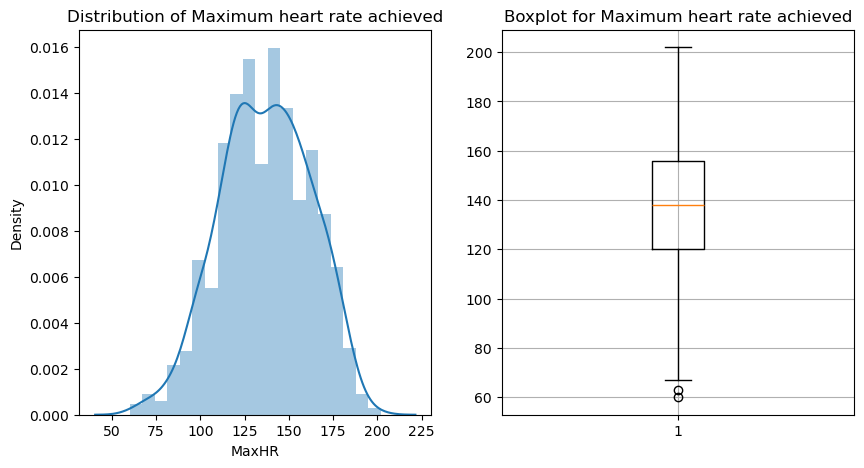

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df.MaxHR)
plt.title("Distribution of Maximum heart rate achieved")

plt.subplot(1,2,2)
plt.boxplot(df.MaxHR)
plt.title('Boxplot for Maximum heart rate achieved')
plt.grid()

## Result : Most of the paitents heart Rate lies in range 100-175 bpm

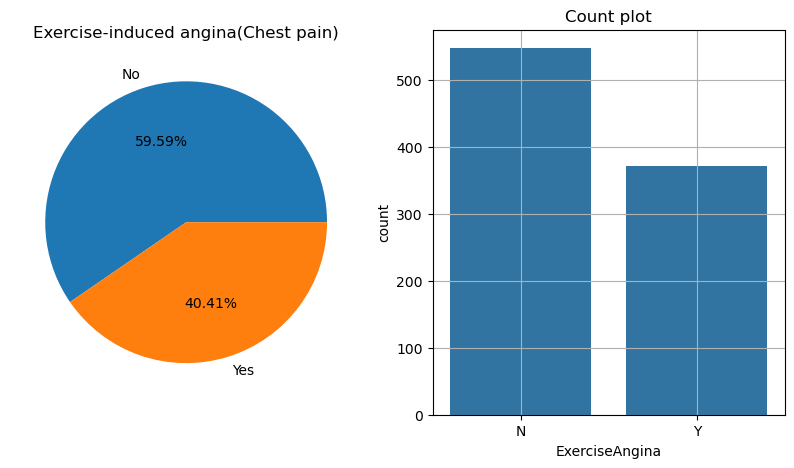

In [111]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.pie(df.ExerciseAngina.value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title("Exercise-induced angina(Chest pain)")

plt.subplot(1,2,2)
sns.barplot(df.ExerciseAngina.value_counts())
plt.title('Count plot')
plt.grid()
plt.show()

## Result: 40.41% of the paitents are having chest pain during exercise.

In [22]:
df.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [23]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

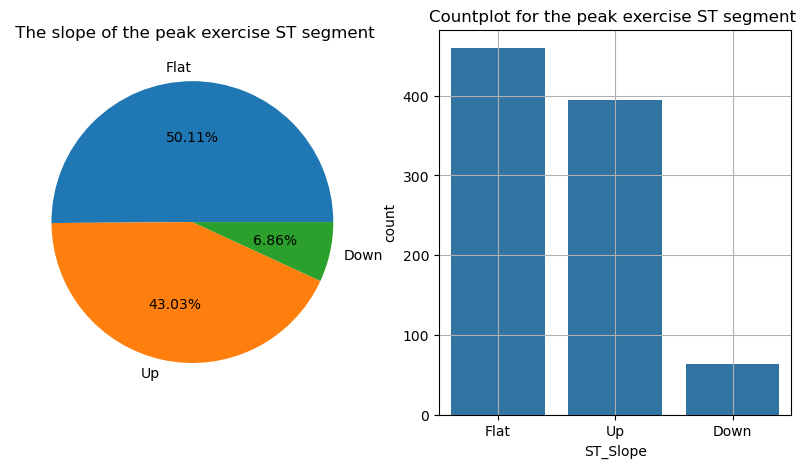

In [112]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.ST_Slope.value_counts(),labels=['Flat','Up','Down'],autopct='%1.2f%%')
plt.title(' The slope of the peak exercise ST segment')

plt.subplot(1,2,2)
sns.barplot(df.ST_Slope.value_counts())
plt.title('Countplot for the peak exercise ST segment ')
plt.grid()
plt.show()

In [25]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

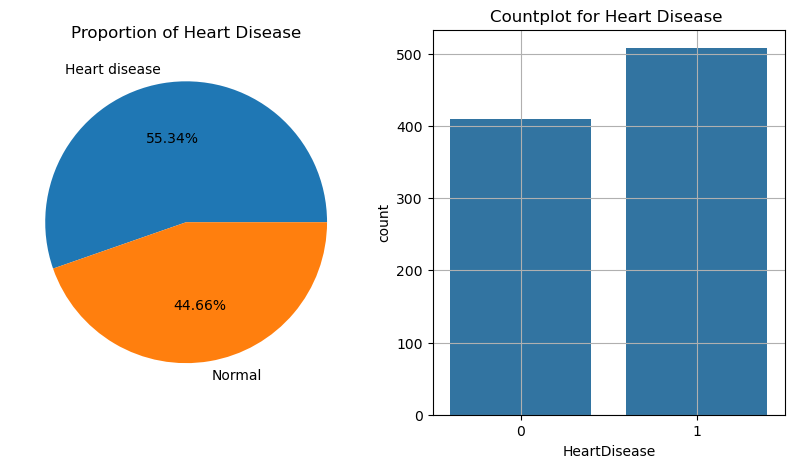

In [113]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.HeartDisease.value_counts(),labels=["Heart disease","Normal"],autopct='%1.2f%%')
plt.title("Proportion of Heart Disease")

plt.subplot(1,2,2)
sns.barplot(df.HeartDisease.value_counts())
plt.title('Countplot for Heart Disease ')
plt.grid()
plt.show()



## Result: 55.34% of the paitents are having Heart disease

# Multivariate Analysis:

In [92]:
df.select_dtypes(include=np.number).corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [93]:
df.select_dtypes(include=np.number).corr().HeartDisease

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

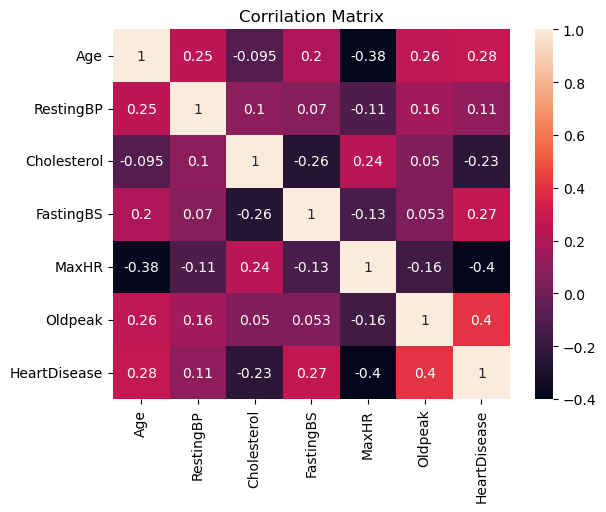

In [97]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.title("Corrilation Matrix")
plt.show()

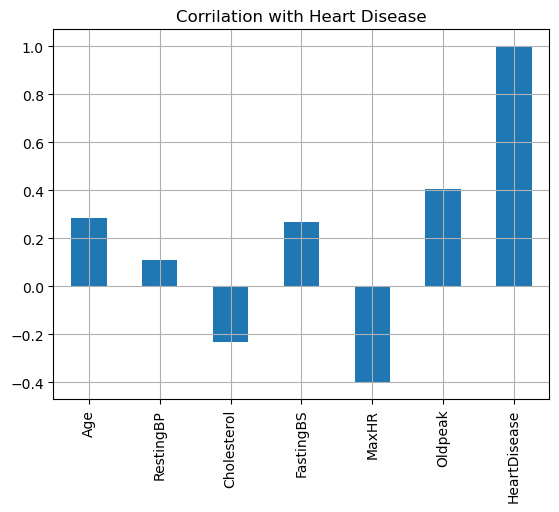

In [122]:
df.select_dtypes(include=np.number).corr().HeartDisease.plot(kind = 'bar')
plt.title("Corrilation with Heart Disease")
plt.grid()
plt.show()

# Spliting Data into factors and levels

In [163]:
X = df.drop("HeartDisease",axis=1)
y= df.HeartDisease

# Spliting data for training and testing

In [238]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat
852,43,M,ASY,120,177,0,LVH,120,Y,2.5,Flat
626,53,M,ASY,142,226,0,LVH,111,Y,0.0,Up
397,58,M,ASY,170,0,1,ST,105,Y,0.0,Flat
360,62,M,NAP,160,0,0,Normal,72,Y,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
406,57,M,ASY,140,0,1,Normal,100,Y,0.0,Flat
774,66,F,ASY,178,228,1,Normal,165,Y,1.0,Flat
695,58,M,ASY,146,218,0,Normal,105,N,2.0,Flat
140,52,M,ASY,160,331,0,Normal,94,Y,2.5,Flat


#  Encoding categorical variables 

In [239]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first",sparse_output=False,dtype=np.int32)
X_train_new = ohe.fit_transform(X_train[["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]])
X_test_new = ohe.fit_transform(X_test[["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]])

In [240]:
X_train_new.shape

(688, 9)

# Mearging all Encoded value with Numerical value

In [241]:
X_train_values = X_train[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]].values
X_test_values = X_test[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]].values

In [242]:
X_train = np.hstack((X_train_values,X_train_new))

In [243]:
X_test = np.hstack((X_test_values,X_test_new))

# Scallling data

In [244]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Training the dataset by logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
clf = LogisticRegression()

In [247]:
clf.fit(X_train,y_train)

LogisticRegression()

In [248]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [249]:
y_test.values

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

# Accuracy of model prediction

In [251]:
from sklearn.metrics import accuracy_score

In [259]:
accuracy_score(y_test,y_pred)*100

85.65217391304348

# Accuracy = 85.65% 